In [39]:
# import the libraries needed
import pandas as pd 
import numpy as np
from sklearn.metrics import accuracy_score

In [40]:
# reading training and testing sets
df_train = pd.read_csv('https://github.com/alexchanocua/Titanic_ML/raw/main/train.csv')

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
df_train.Embarked.fillna("U", inplace=True)

In [42]:
# performing onehot encoding traning and testing set
df_train = pd.get_dummies(data = df_train, columns = ['Pclass','Sex','Embarked'])
df_train.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_U
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,1,0,0,1,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,1,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,1,0,0,0,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,1,0,0,0,1,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,1,0,1,0,0,1,0


In [43]:
# training sets
feature_cols = ['Fare','Parch','Age','Pclass_1',
                'Pclass_2','Pclass_3','Sex_female','Sex_male',
                'Embarked_C','Embarked_Q','Embarked_S', 'Embarked_U']

for col in feature_cols :
    df_train[col].fillna(df_train[col].median(), inplace=True)
    
X = df_train[feature_cols]
y = df_train['Survived']

X.head()

,Fare,Parch,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_U
0,7.2500,0,22.0,0,0,1,0,1,0,0,1,0
1,71.2833,0,38.0,1,0,0,1,0,1,0,0,0
2,7.9250,0,26.0,0,0,1,1,0,0,0,1,0
3,53.1000,0,35.0,1,0,0,1,0,0,0,1,0
4,8.0500,0,35.0,0,0,1,0,1,0,0,1,0


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

In [45]:
# creating DT tree
from sklearn.tree import DecisionTreeClassifier

my_DT = DecisionTreeClassifier(random_state=3)
my_DT.fit(X_train, y_train)
y_predict = my_DT.predict(X_test)
score = accuracy_score(y_test, y_predict)
print(f"Accuracy of training test split: {score}")


Accuracy of training test split: 0.7761194029850746


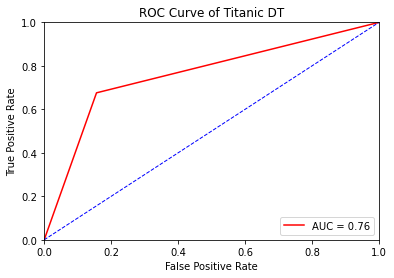

In [46]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

fpr, tpr, threshold = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],color = 'blue', lw=1, linestyle = '--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Titanic DT')
plt.show()